# Model `BinaryMFThresholdExSigmoidColumnwise`

In [32]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1718747308


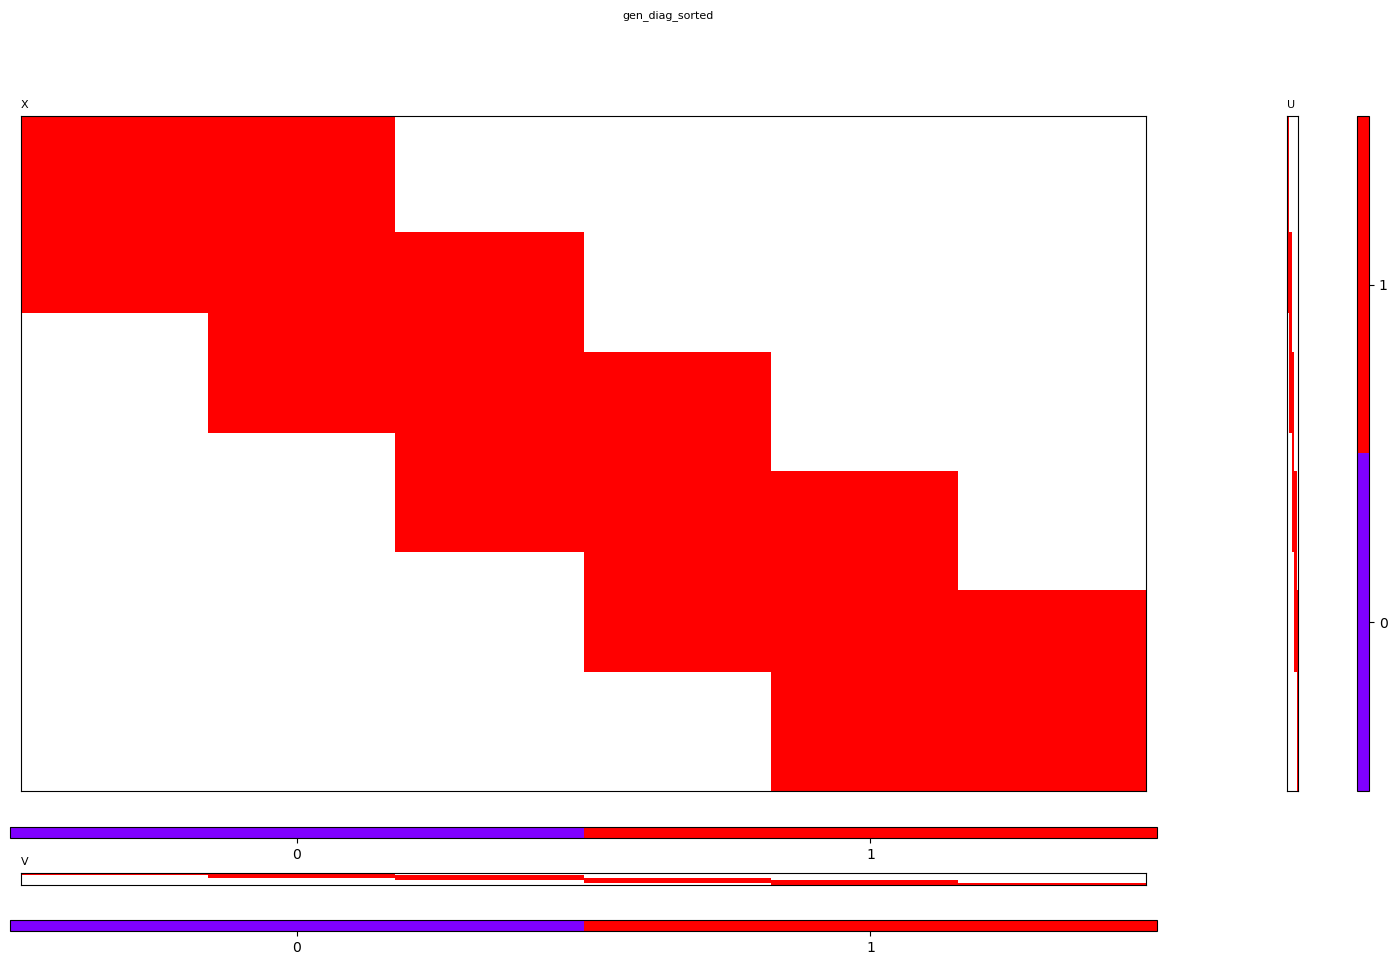

<Figure size 640x480 with 0 Axes>

In [33]:
from generators import BlockDiagonalMatrixGenerator

n_row, n_col, k, seed = 300, 500, 5, None

# data = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[0.2, 0.1, 0.2, 0.1])
data = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[0.4, 0.5])

data.generate(seed=seed) # if no seed assigned, use time instead

data.show_matrix(title="gen_diag_sorted")

In [34]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [35]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 43387
[I]   val_size     : 6199
[I]   test_size    : 12397
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 88017
[I]   n_negatives  : 61983
[I]   train_size   : 43387
[I]   val_size     : 6199
[I]   test_size    : 12397
[I]   seed         : 2023


# `NMFSklearn` initialization

The thresholding gap can be relatively wide if you init with `NMFSklearn` followed by `BinaryMFPenalty`, as the factors are already (near) binary.

[I] k            : 5
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.


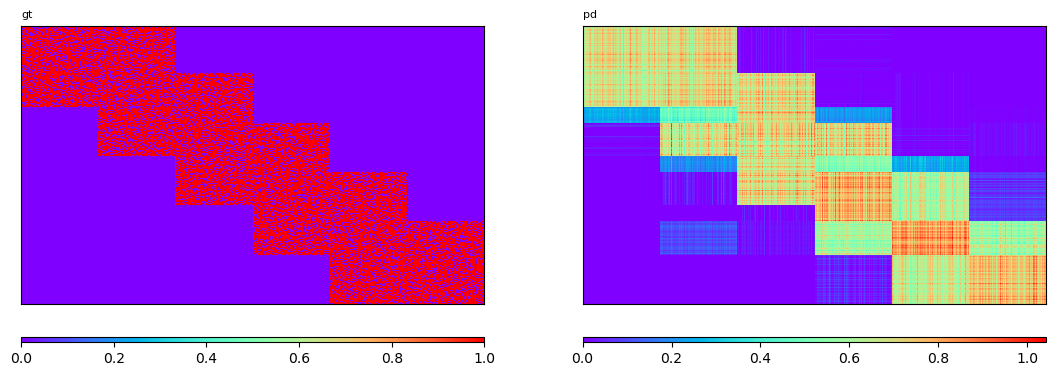

[I] model saved as: 24-06-19_05-48-30_NMFSklearn.pickle


<Figure size 640x480 with 0 Axes>

In [36]:
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

k = 5
reg = 1
reg_growth = 3

from models import NMFSklearn, BinaryMFPenalty

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

U, V = model_nmf.U, model_nmf.V

# `BinaryMFPenalty` initialization

In [37]:
# model_bmf = BinaryMFPenalty(k=k, U=U, V=V, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=100, seed=2024)
# model_bmf.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# U, V = model_bmf.U, model_bmf.V

# Shared params

In [38]:
us, vs = 0.1, 0.1
u, v = us, vs

W = 'full'
# W = 'mask'

init_method = 'custom'
link_lamda = 10
task = 'reconstruction'

# `BinaryMFThreshold`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] u            : 0.1
[I] v            : 0.1
[I] lamda        : 100
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 1718747310
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.1685201137086718] -> [0.0, 1.0], V: [0.0, 1.3487955526534505] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [100525.916, 58608.977]
[I] iter: 2, start: [0.867, 0.547], direction: [-55630.262, -1155.812]
[I] iter: 3, start: [0.655, 0.543], direction: [-11880.680, -827.850]
[I] iter: 4, start: [0.609, 0.540], direction: [899.764, -548.263]
[I] iter: 5, start: [0.630, 0.527], direction: [-2137.412, -1884.147]
[I] iter: 6, start: [0.614, 0.513], direction: [1313.340, 213.696]
[I] iter: 7, start: [0.624, 0.514], direction: [18.291, -214.359]
[I] iter: 8, start: [0.624,

train  \
                                                                     0   
                 time iter         u         v             F    Recall   
0   19/06/24 05:48:31    0  0.100000  0.100000  24863.366803  1.000000   
1   19/06/24 05:48:31    1  0.866952  0.547151  13674.838700  0.472722   
2   19/06/24 05:48:31    2  0.654739  0.542742  10577.116882  0.850785   
3   19/06/24 05:48:31    3  0.609418  0.539584  10386.988173  0.891465   
4   19/06/24 05:48:32    4  0.630012  0.527035  10369.109681  0.882914   
5   19/06/24 05:48:32    5  0.613705  0.512660  10356.620010  0.895568   
6   19/06/24 05:48:32    6  0.623725  0.514291  10348.667984  0.890797   
7   19/06/24 05:48:32    7  0.624004  0.511020  10348.560868  0.890797   
8   19/06/24 05:48:33    8  0.624321  0.513083  10348.512077  0.890797   
9   19/06/24 05:48:33    9  0.623584  0.512445  10348.483896  0.890797   
10  19/06/24 05:48:33   10  0.624256  0.512458  10348.476622  0.890797   
11  19/06/24 05:48:34   11  0.623996  0.512407  10348.466687  0.890797   
12  19/06/24 05:48:34   12  0.623955  0.512387  10348.466649  0.890797   

                                       val                                \
                                         0                                 
   Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0   0.590380  0.799313  0.742439  1.000000  0.084352  0.551393  0.155580   
1   0.724633  0.795527  0.572178  0.427972  0.093732  0.805353  0.153784   
2   0.704017  0.853380  0.770473  0.836909  0.098947  0.678300  0.176971   
3   0.702381  0.859347  0.785707  0.884014  0.099515  0.664627  0.178892   
4   0.702778  0.858127  0.782614  0.875141  0.099527  0.667620  0.178727   
5   0.701790  0.859720  0.786925  0.891757  0.099843  0.663267  0.179580   
6   0.702288  0.859187  0.785389  0.884659  0.099649  0.664907  0.179122   
7   0.702288  0.859187  0.785389  0.884659  0.099649  0.664907  0.179122   
8   0.702288  0.859187  0.785389  0.884659  0.099649  0.664907  0.179122   
9   0.702288  0.859187  0.785389  0.884659  0.099649  0.664907  0.179122   
10  0.702288  0.859187  0.785389  0.884659  0.099649  0.664907  0.179122   
11  0.702288  0.859187  0.785389  0.884659  0.099649  0.664907  0.179122   
12  0.702288  0.859187  0.785389  0.884659  0.099649  0.664907  0.179122   

        test                                
           0                                
      Recall Precision  Accuracy        F1  
0   1.000000  0.168690  0.592713  0.288682  
1   0.414697  0.181635  0.797207  0.252623  
2   0.833347  0.197036  0.705553  0.318715  
3   0.879971  0.198104  0.695693  0.323402  
4   0.869243  0.197696  0.697647  0.322128  
5   0.885940  0.198367  0.694680  0.324154  
6   0.879245  0.198063  0.695800  0.323298  
7   0.879245  0.198063  0.695800  0.323298  
8   0.879245  0.198063  0.695800  0.323298  
9   0.879245  0.198063  0.695800  0.323298  
10  0.879245  0.198063  0.695800  0.323298  
11  0.879245  0.198063  0.695800  0.323298  
12  0.879245  0.198063  0.695800  0.323298

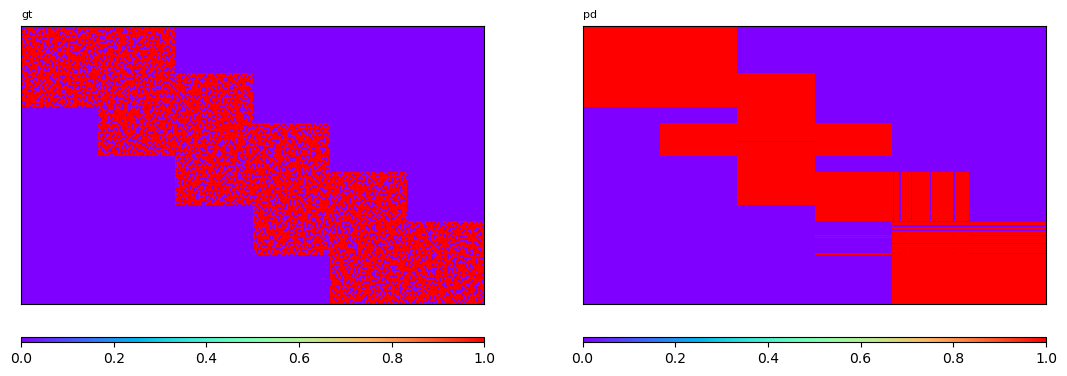

[I] model saved as: 24-06-19_05-48-34_BinaryMFThreshold.pickle


<Figure size 640x480 with 0 Axes>

In [39]:
from models import BinaryMFThreshold

model = BinaryMFThreshold(k=k, U=U, V=V, W=W, u=u, v=v)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# `BinaryMFThresholdExSigmoid`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] u            : 0.1
[I] v            : 0.1
[I] link_lamda   : 10
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] solver       : line-search
[I] init_method  : custom
[I] seed         : 1718747315
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.0] -> [0.0, 1.0], V: [0.0, 1.0] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [5336.407, 1153.267]
[I] iter: 2, start: [0.751, 0.241], direction: [-1216.391, -108.994]
[I] iter: 3, start: [0.454, 0.214], direction: [-123.459, 1.575]
[I] iter: 4, start: [0.417, 0.215], direction: [686.724, 1.556]
[I] iter: 5, start: [0.422, 0.215], direction: [-398.065, 1.556]
[I] iter: 6, start: [0.419, 0.215], direction: [192.894, 1.555]
[I] iter: 7, start: [0.420, 0.215], direction: [-120.936, 1.555]
[I] iter: 8, start: [0.420, 0.215], direction: [72.410, 1.

train  \
                                                                     0   
                 time iter         u         v             F    Recall   
0   19/06/24 05:48:35    0  0.100000  0.100000  14571.797883  1.000000   
1   19/06/24 05:48:35    1  0.751417  0.240780  11287.964912  0.799410   
2   19/06/24 05:48:35    2  0.454446  0.214170   9759.405867  0.951276   
3   19/06/24 05:48:36    3  0.416770  0.214650   9704.444751  0.958052   
4   19/06/24 05:48:36    4  0.422009  0.214662   9698.437918  0.953834   
5   19/06/24 05:48:37    5  0.418972  0.214674   9694.759775  0.958052   
6   19/06/24 05:48:37    6  0.420444  0.214686   9694.267798  0.956646   
7   19/06/24 05:48:38    7  0.419521  0.214698   9694.032437  0.958052   
8   19/06/24 05:48:38    8  0.420073  0.214710   9693.959088  0.956646   
9   19/06/24 05:48:38    9  0.419729  0.214722   9693.928164  0.958052   
10  19/06/24 05:48:39   10  0.419940  0.214733   9693.917039  0.956646   
11  19/06/24 05:48:39   11  0.419809  0.214745   9693.912517  0.958052   
12  19/06/24 05:48:40   12  0.419889  0.214757   9693.910720  0.958052   
13  19/06/24 05:48:40   13  0.419840  0.214769   9693.909912  0.958052   

                                       val                                \
                                         0                                 
   Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0   0.590380  0.799313  0.742439  1.000000  0.084352  0.551393  0.155580   
1   0.704859  0.845160  0.749163  0.782868  0.098624  0.695333  0.175180   
2   0.699602  0.867760  0.806255  0.954025  0.100246  0.644227  0.181428   
3   0.696743  0.867253  0.806766  0.959510  0.099700  0.640253  0.180631   
4   0.699515  0.868133  0.807115  0.956122  0.100184  0.643293  0.181365   
5   0.696743  0.867253  0.806766  0.959510  0.099700  0.640253  0.180631   
6   0.697662  0.867547  0.806882  0.958380  0.099860  0.641267  0.180874   
7   0.696743  0.867253  0.806766  0.959510  0.099700  0.640253  0.180631   
8   0.697662  0.867547  0.806882  0.958380  0.099860  0.641267  0.180874   
9   0.696743  0.867253  0.806766  0.959510  0.099700  0.640253  0.180631   
10  0.697662  0.867547  0.806882  0.958380  0.099860  0.641267  0.180874   
11  0.696743  0.867253  0.806766  0.959510  0.099700  0.640253  0.180631   
12  0.696743  0.867253  0.806766  0.959510  0.099700  0.640253  0.180631   
13  0.696743  0.867253  0.806766  0.959510  0.099700  0.640253  0.180631   

        test                                
           0                                
      Recall Precision  Accuracy        F1  
0   1.000000  0.168690  0.592713  0.288682  
1   0.780027  0.196517  0.718240  0.313941  
2   0.952489  0.200153  0.681493  0.330793  
3   0.959506  0.199383  0.678227  0.330160  
4   0.955876  0.200301  0.680947  0.331200  
5   0.959506  0.199383  0.678227  0.330160  
6   0.958296  0.199687  0.679133  0.330505  
7   0.959506  0.199383  0.678227  0.330160  
8   0.958296  0.199687  0.679133  0.330505  
9   0.959506  0.199383  0.678227  0.330160  
10  0.958296  0.199687  0.679133  0.330505  
11  0.959506  0.199383  0.678227  0.330160  
12  0.959506  0.199383  0.678227  0.330160  
13  0.959506  0.199383  0.678227  0.330160

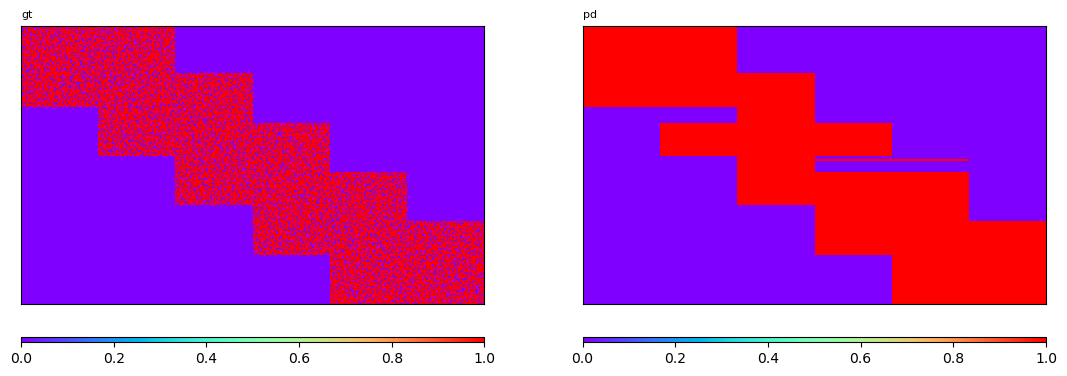

[I] model saved as: 24-06-19_05-48-41_BinaryMFThresholdExSigmoid.pickle


<Figure size 640x480 with 0 Axes>

In [40]:
from models import BinaryMFThresholdExSigmoid

model = BinaryMFThresholdExSigmoid(k=k, U=U, V=V, W=W, u=u, v=v, link_lamda=link_lamda)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# `BinaryMFThresholdExColumnwise`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] us           : 0.1
[I] vs           : 0.1
[I] lamda        : 10
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] solver       : line-search
[I] seed         : 1718747321
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.0] -> [0.0, 1.0], V: [0.0, 1.0] -> [0.0, 1.0]
[I] iter: 1
[I] iter: 2
[I] iter: 3
[I] iter: 4
[I] iter: 5
[I] iter: 6
[I] iter: 7
[I] iter: 8
[I] iter: 9
[I] iter: 10
[I] iter: 11
[W] Stopped in advance: Difference lower than threshold


\
                                                                                
                 time iter                                                 us   
0   19/06/24 05:48:41    0                          [0.1, 0.1, 0.1, 0.1, 0.1]   
1   19/06/24 05:48:41    1  [0.3292498616012133, 0.5668762481384362, 0.530...   
2   19/06/24 05:48:41    2  [0.7368824611759458, 0.99999, 0.99999, 0.99999...   
3   19/06/24 05:48:42    3  [0.7283317723236924, 0.8879128334061137, 0.881...   
4   19/06/24 05:48:42    4  [0.7309967417778519, 0.9036765551749837, 0.899...   
5   19/06/24 05:48:42    5  [0.7294353931535288, 0.893810310196834, 0.8979...   
6   19/06/24 05:48:43    6  [0.7295788506127044, 0.8994076656931903, 0.898...   
7   19/06/24 05:48:43    7  [0.7294317816123232, 0.8972241009357771, 0.898...   
8   19/06/24 05:48:43    8  [0.729448877508179, 0.8983548458190066, 0.8981...   
9   19/06/24 05:48:43    9  [0.7294771643885277, 0.8979280725929216, 0.898...   
10  19/06/24 05:48:44   10  [0.7295065074938256, 0.8981015710342147, 0.898...   
11  19/06/24 05:48:44   11  [0.7295358780134819, 0.8980257389642972, 0.898...   

                                                                     train  \
                                                                         0   
                                                   vs             F Recall   
0                           [0.1, 0.1, 0.1, 0.1, 0.1]  91590.644526    1.0   
1   [0.7571821293946308, 0.5216707236577213, 0.508...  24238.721198    1.0   
2   [0.99999, 0.99999, 0.885322986871, 0.99999, 0....  10661.194433    1.0   
3   [0.9361836953592684, 0.8879143576984796, 0.828...   8884.563670    1.0   
4   [0.9508247820795712, 0.9036956433772421, 0.839...   8740.198004    1.0   
5   [0.9413308060014175, 0.8938363273072554, 0.838...   8722.949163    1.0   
6   [0.9419727340850256, 0.8994449348857131, 0.839...   8718.889418    1.0   
7   [0.9409584103670898, 0.8972695943359718, 0.839...   8718.180693    1.0   
8   [0.9408833761169529, 0.8984097903215971, 0.839...   8718.072192    1.0   
9   [0.9408717510188672, 0.8979917844862579, 0.839...   8718.054486    1.0   
10  [0.9408662875572581, 0.8981743518138201, 0.839...   8718.051488    1.0   
11  [0.9408609806813284, 0.8981074459677961, 0.839...   8718.050930    1.0   

                                    val                                test  \
                                      0                                   0   
   Precision  Accuracy        F1 Recall Precision  Accuracy       F1 Recall   
0    0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
1    0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
2    0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
3    0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
4    0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
5    0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
6    0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
7    0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
8    0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
9    0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
10   0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
11   0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   

                                  
                                  
   Precision  Accuracy        F1  
0    0.16869  0.592713  0.288682  
1    0.16869  0.592713  0.288682  
2    0.16869  0.592713  0.288682  
3    0.16869  0.592713  0.288682  
4    0.16869  0.592713  0.288682  
5    0.16869  0.592713  0.288682  
6    0.16869  0.592713  0.288682  
7    0.16869  0.592713  0.288682  
8    0.16869  0.592713  0.288682  
9    0.16869  0.592713  0.288682  
10   0.16869  0.592713  0.288682  
11   0.16869  0.

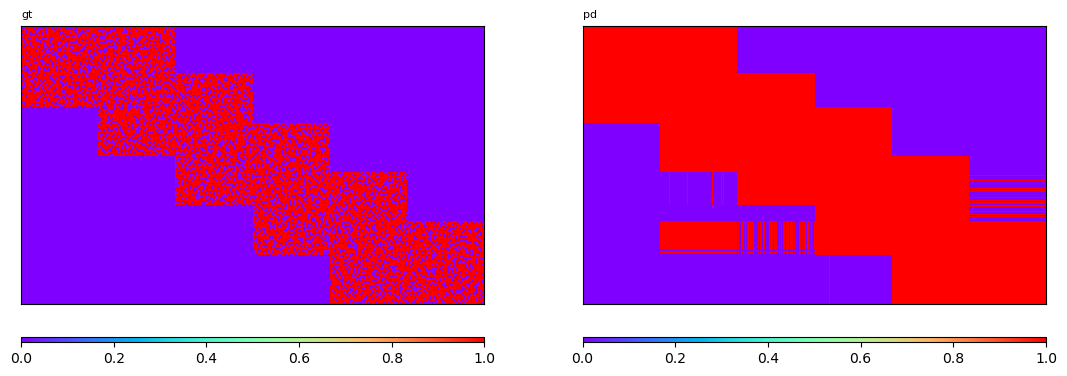

[I] model saved as: 24-06-19_05-48-44_BinaryMFThresholdExColumnwise.pickle


<Figure size 640x480 with 0 Axes>

In [41]:
from models import BinaryMFThresholdExColumnwise

solver = 'line-search'
lamda = 10

model = BinaryMFThresholdExColumnwise(k=k, U=U, V=V, W=W, us=us, vs=vs, solver=solver, lamda=lamda)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# `BinaryMFThresholdExSigmoidColumnwise`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] us           : 0.1
[I] vs           : 0.1
[I] link_lamda   : 10
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] solver       : line-search
[I] init_method  : custom
[I] seed         : 1718747325
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.0] -> [0.0, 1.0], V: [0.0, 1.0] -> [0.0, 1.0]
(300, 500) (300, 500) (300, 500)
[I] iter: 1
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)


d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv


(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)


d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv


(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)


d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv


(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)


d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv


(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
[I] iter: 2
(300, 500) (300, 500) (300, 500)


d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv


(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
[I] iter: 3
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
[I] iter: 4
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
[I] iter: 5
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
[I] iter: 6
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
[I] iter: 7
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
[I] iter: 8
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
(300, 500) (300, 500) (300, 500)
[I] iter: 9
(300, 500) (300, 500) (30

\
                                                                               
                time iter                                                 us   
0  19/06/24 05:48:45    0                          [0.1, 0.1, 0.1, 0.1, 0.1]   
1  19/06/24 05:48:46    1  [0.10072956037552279, 0.99999, 0.1042046660346...   
2  19/06/24 05:48:46    2  [0.10072957126476796, 0.9947225885366433, 0.10...   
3  19/06/24 05:48:47    3  [0.10072959033651714, 0.9983900585396833, 0.10...   
4  19/06/24 05:48:47    4  [0.1007296544442715, 0.9956738443019926, 0.104...   
5  19/06/24 05:48:48    5  [0.1007297683994645, 0.9987477220107197, 0.104...   
6  19/06/24 05:48:48    6  [0.10072983874279168, 0.9976472525178836, 0.10...   
7  19/06/24 05:48:49    7  [0.10072990851239477, 0.9977679268446563, 0.10...   
8  19/06/24 05:48:49    8  [0.10073004760428247, 0.9977661213900139, 0.10...   
9  19/06/24 05:48:50    9  [0.10073018634239365, 0.9977680059498725, 0.10...   

                                                                    train  \
                                                                        0   
                                                  vs             F Recall   
0                          [0.1, 0.1, 0.1, 0.1, 0.1]  14571.797883    1.0   
1  [0.99999, 0.4532811176148357, 0.10152073118230...  11157.466395    1.0   
2  [0.9958906999732746, 0.4532811176148357, 0.101...  11040.467349    1.0   
3  [0.997113364667916, 0.4532811176148357, 0.1015...  10803.474222    1.0   
4  [0.9970514059359606, 0.4532811176148357, 0.101...  10682.040080    1.0   
5  [0.9969509833187384, 0.4532811176148357, 0.101...  10619.334033    1.0   
6  [0.9969514085277197, 0.4532811176148357, 0.101...  10597.577462    1.0   
7  [0.9969519103838558, 0.4532811176148357, 0.101...  10597.266833    1.0   
8  [0.9969525832900931, 0.4532811176148357, 0.101...  10597.265777    1.0   
9  [0.9969526725486277, 0.4532811176148357, 0.101...  10597.265731    1.0   

                                   val                                test  \
                                     0                                   0   
  Precision  Accuracy        F1 Recall Precision  Accuracy       F1 Recall   
0   0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
1   0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
2   0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
3   0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
4   0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
5   0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
6   0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
7   0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
8   0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   
9   0.59038  0.799313  0.742439    1.0  0.084352  0.551393  0.15558    1.0   

                                 
                                 
  Precision  Accuracy        F1  
0   0.16869  0.592713  0.288682  
1   0.16869  0.592713  0.288682  
2   0.16869  0.592713  0.288682  
3   0.16869  0.592713  0.288682  
4   0.16869  0.592713  0.288682  
5   0.16869  0.592713  0.288682  
6   0.16869  0.592713  0.288682  
7   0.16869  0.592713  0.288682  
8   0.16869  0.592713  0.288682  
9   0.16869  0.592713  0.288682

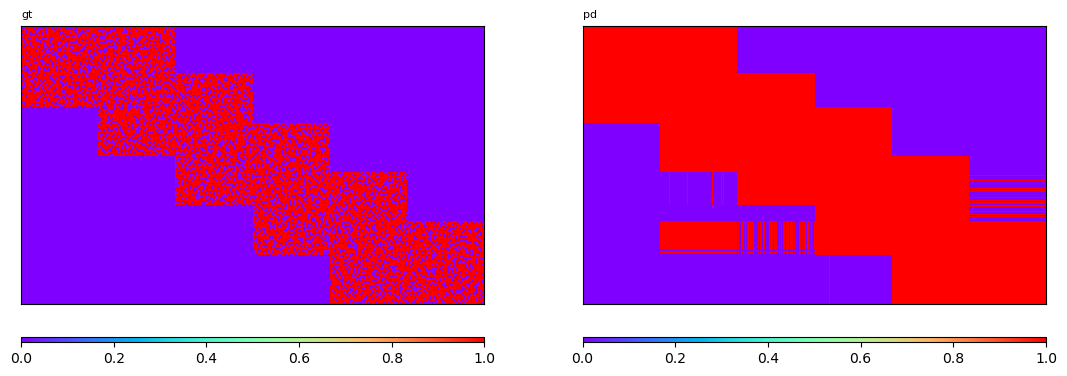

[I] model saved as: 24-06-19_05-48-50_BinaryMFThresholdExSigmoidColumnwise.pickle


<Figure size 640x480 with 0 Axes>

In [42]:
from models import BinaryMFThresholdExSigmoidColumnwise

lamda = 100

model = BinaryMFThresholdExSigmoidColumnwise(k=k, U=U, V=V, W=W, us=us, vs=vs, lamda=lamda, link_lamda=link_lamda)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)